In [1]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from scipy import ndimage
import seaborn as sns



In [2]:
#loading the dataset
test_data= pd.read_csv('C:/Users/kasya/Downloads/archive (7)/exoTest.csv')
train_data=pd.read_csv('C:/Users/kasya/Downloads/archive (7)/exoTrain.csv')

In [3]:
train_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [3]:
category={2:1,1:0}
train_data.LABEL = [category[item] for item in train_data.LABEL]
test_data.LABEL = [category[item] for item in test_data.LABEL]

In [5]:
train_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [5]:
test_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,0,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,0,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,0,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


In [6]:
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [17]:
test_data.isnull().values.any()

False

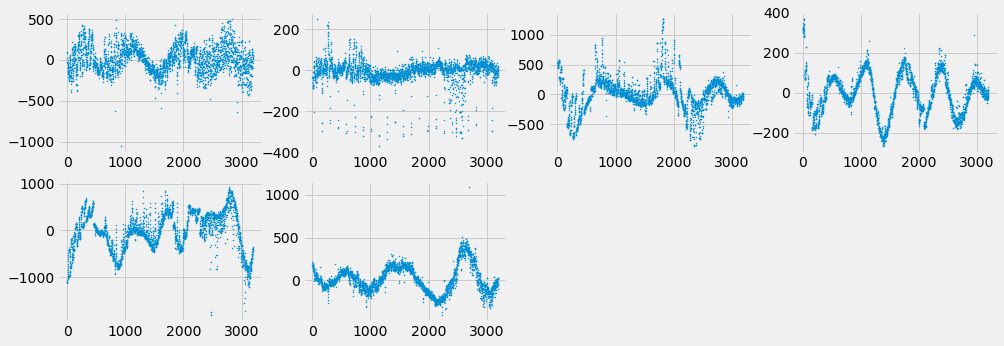

In [29]:
#Stars with Exoplanets
fig = plt.figure(figsize=(15,40))
for i in range(6):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train_data[train_data['LABEL'] == 1].iloc[i,1:],s=1)

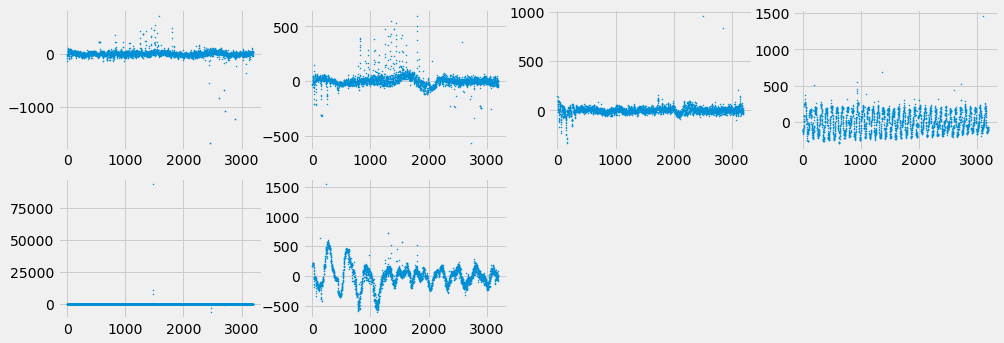

In [32]:
#Stars without Exoplanets
fig = plt.figure(figsize=(15,40))
for i in range(6):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train_data[train_data['LABEL']==0].iloc[i,1:],s=1)

Text(0.5, 1.0, 'Class Distribution \n (0: Not Exoplanet \n 1: Exoplanet)')

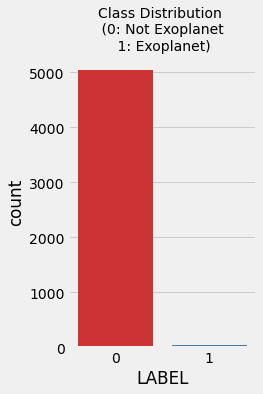

In [4]:
plt.figure(figsize=(3,5))
colors = ["0", "1"]
sns.countplot('LABEL', data=train_data, palette = "Set1")
plt.title('Class Distribution \n (0: Not Exoplanet \n 1: Exoplanet)', fontsize=14)

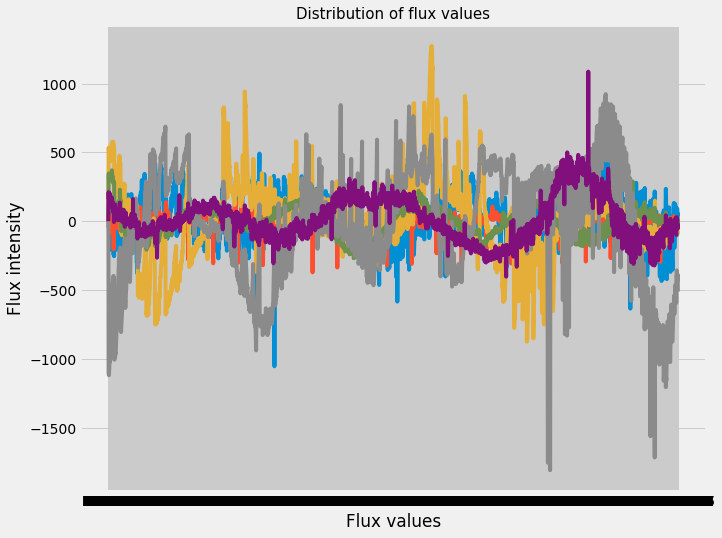

In [5]:
plt.figure(figsize=(10,8))
plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train_data.iloc[0,])
plt.plot(train_data.iloc[1,])
plt.plot(train_data.iloc[2,])
plt.plot(train_data.iloc[3,])
plt.plot(train_data.iloc[4,])
plt.plot(train_data.iloc[5,])
plt.show()

Text(0.5, 1.0, 'Correlation in the data')

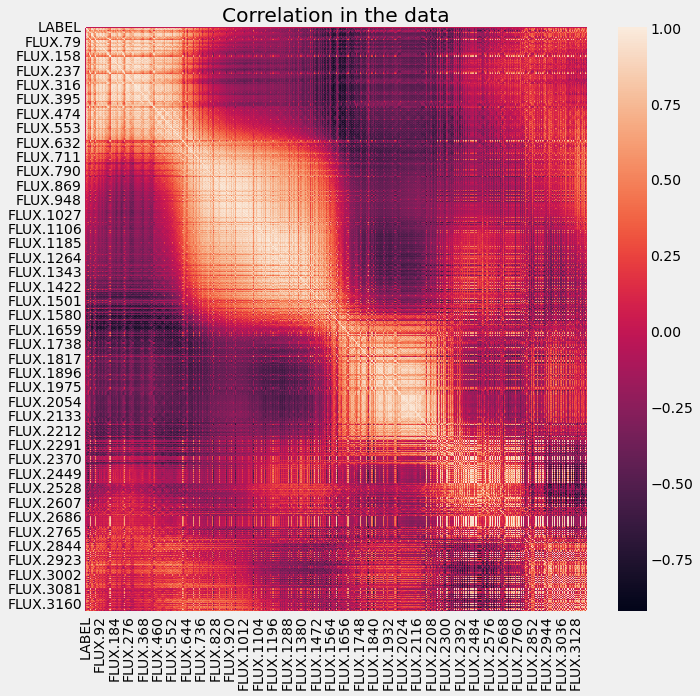

In [9]:
plt.figure(figsize=(10,10))
corrmatt= train_data.corr()
sns.heatmap(corrmatt)
plt.title('Correlation in the data')


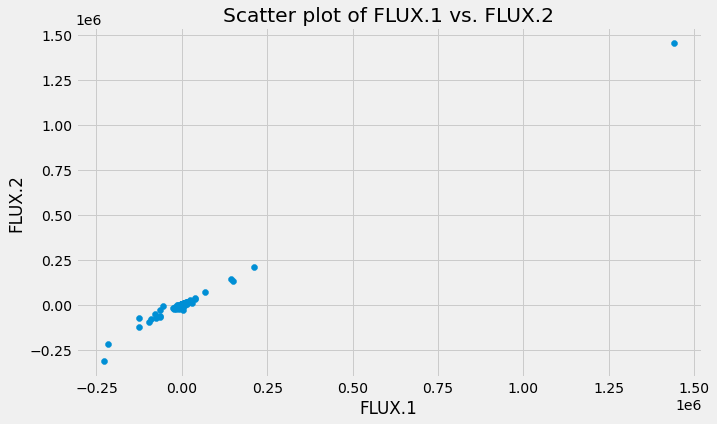

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

x = train_data['FLUX.1']
y = train_data['FLUX.2']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('FLUX.1')
plt.ylabel('FLUX.2')
plt.title('Scatter plot of FLUX.1 vs. FLUX.2')

# Show the plot
plt.show()

In [5]:
x_train = train_data.drop(["LABEL"],axis=1)
y_train = train_data["LABEL"]   
x_test = test_data.drop(["LABEL"],axis=1)
y_test = test_data["LABEL"]

In [6]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

In [7]:
# Define a function to calculate the rolling mean of a time series
def rolling_mean(x, window_size):
    return np.convolve(x, np.ones(window_size) / window_size, mode='same')

# Create new features using rolling mean
train_data['flux_rolling_mean'] = rolling_mean(train_data['FLUX.1'], 10)
test_data['flux_rolling_mean'] = rolling_mean(test_data['FLUX.1'], 10)


In [8]:
#guassian filter
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

In [9]:
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [10]:
pca = PCA() 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1

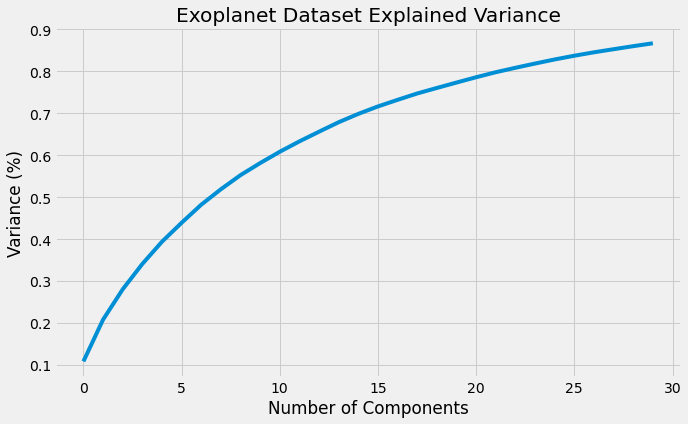

In [11]:
#Apply PCA with n_componenets
pca = PCA(n_components=30)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
x_train= selector.fit_transform(x_train, y_train)
x_test= selector.transform(x_test)

1    5050
0    5050
Name: LABEL, dtype: int64

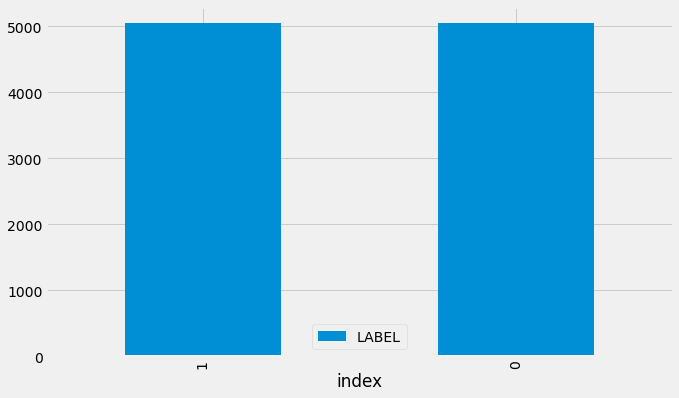

In [13]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_resample(train_data.drop('LABEL',axis=1), train_data['LABEL'])
ov_train_y = ov_train_y.astype('int')
    
ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')
ov_train_y.value_counts()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(ov_train_x, ov_train_y, test_size=0.3, random_state=42)

Final Training Accuracy: 94.39886845827439
Validation Accuracy 92.47524752475248

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      1564
           1       0.87      0.99      0.93      1466

    accuracy                           0.92      3030
   macro avg       0.93      0.93      0.92      3030
weighted avg       0.93      0.92      0.92      3030



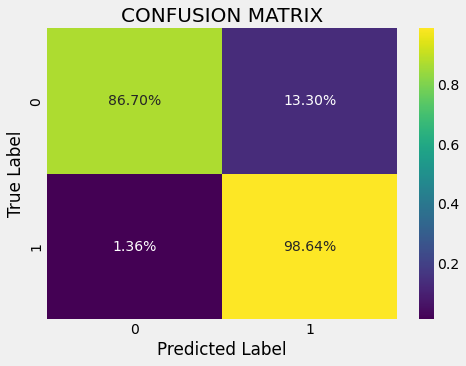

In [18]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(x_train,y_train)

ds_pred=ds_model.predict(x_test)

print(f'Final Training Accuracy: {ds_model.score(x_train,y_train)*100}')
ds_acc=accuracy_score(y_test,ds_pred)*100
print('Validation Accuracy',ds_acc)
print ("\nClassification report :\n",(classification_report(y_test,ds_pred)))

#Confusion matrix
def plot_confusion_matrix(y_test, ds_pred, title='', cmap='viridis'):
    cm = confusion_matrix(y_test, ds_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_percent, annot=True, cmap=cmap, fmt='.2%', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title, fontsize=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
plot_confusion_matrix(y_test, ds_pred, title='CONFUSION MATRIX')

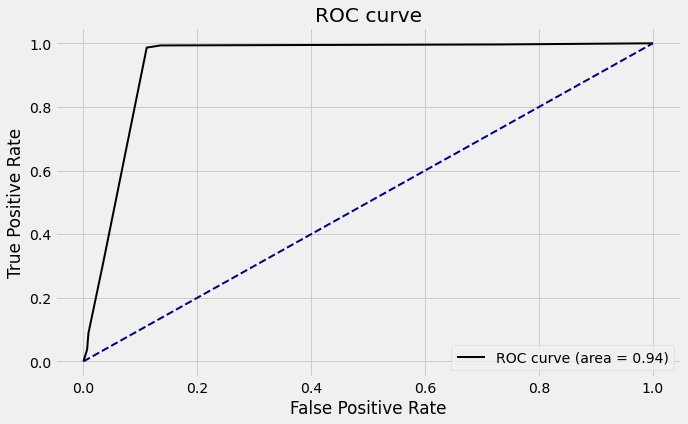

In [17]:

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Final Training Accuracy: 100.0
Validation Accuracy 99.87998799879988

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1700
           1       1.00      1.00      1.00      1633

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



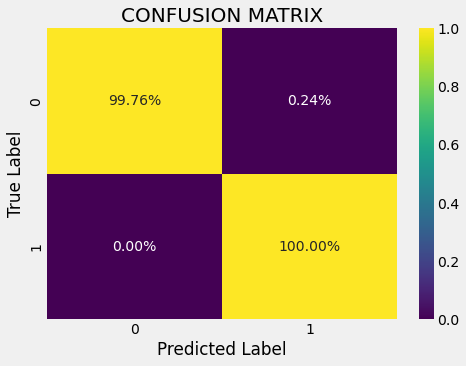

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}')
rf_acc=accuracy_score(y_test,rf_pred)*100
print('Validation Accuracy',rf_acc)
print ("\nClassification report :\n",(classification_report(y_test,rf_pred)))
#Confusion matrix
def plot_confusion_matrix(y_test, rf_pred, title='', cmap='viridis'):
    cm = confusion_matrix(y_test, rf_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_percent, annot=True, cmap=cmap, fmt='.2%', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title, fontsize=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
plot_confusion_matrix(y_test,rf_pred, title='CONFUSION MATRIX')

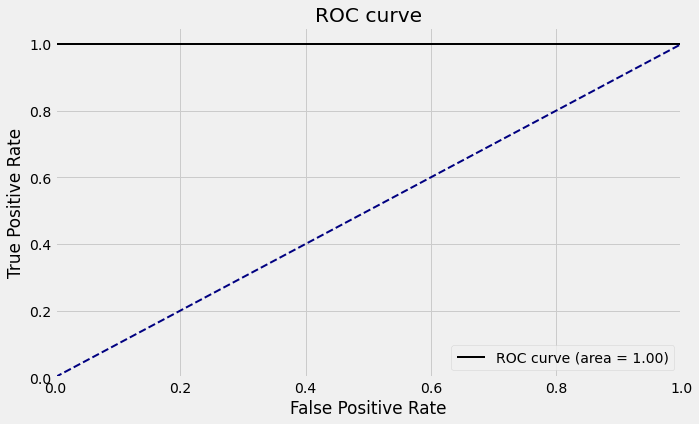

In [21]:
#ROC curve and Area under the curve plotting
predicting_probabilites =rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Final Training Accuracy: 100.0
Validation Accuracy 97.8097809780978

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1700
           1       0.96      1.00      0.98      1633

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333



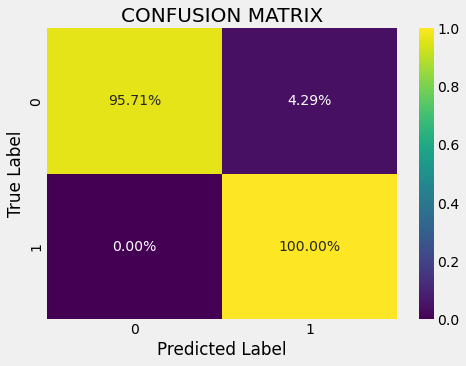

In [16]:
from sklearn.svm import SVC,LinearSVC
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(x_train, y_train)
svc_pred = svclassifier.predict(x_test)

print(f'Final Training Accuracy: {svclassifier.score(x_train,y_train)*100}')
svc_acc = accuracy_score(y_test,svc_pred)*100
print('Validation Accuracy',svc_acc)
print ("\nClassification report :\n",(classification_report(y_test,svc_pred)))
#Confusion matrix
def plot_confusion_matrix(y_test, svc_pred, title='', cmap='viridis'):
    cm = confusion_matrix(y_test, svc_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_percent, annot=True, cmap=cmap, fmt='.2%', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title, fontsize=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
plot_confusion_matrix(y_test, svc_pred, title='CONFUSION MATRIX')

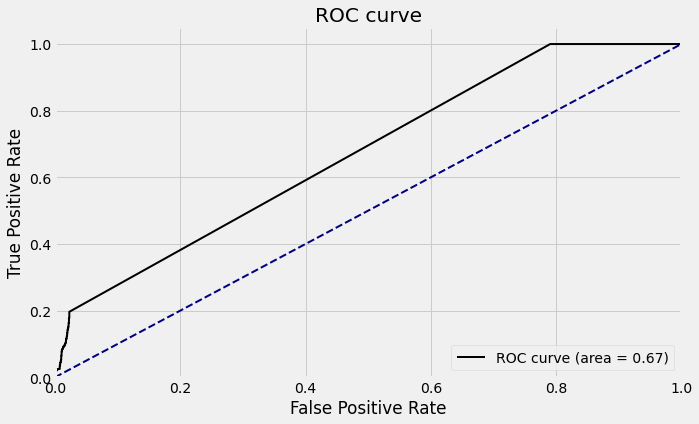

In [23]:
#ROC curve and Area under the curve plotting
predicting_probabilites =svclassifier.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Final Training Accuracy: 98.9507906014482
Validation Accuracy 98.40984098409841

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1700
           1       0.97      1.00      0.98      1633

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333



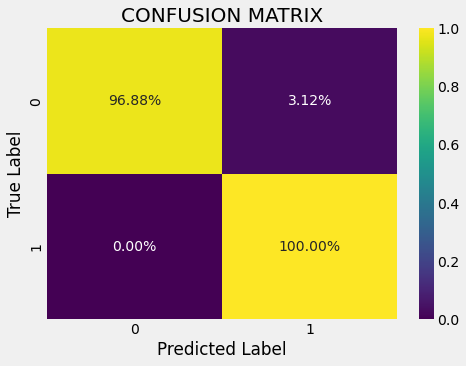

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model.fit(x_train,y_train)

knn_pred=knn_model.predict(x_test)

print(f'Final Training Accuracy: {knn_model.score(x_train,y_train)*100}')
knn_acc = accuracy_score(y_test,knn_pred)*100
print('Validation Accuracy',knn_acc)
print ("\nClassification report :\n",(classification_report(y_test,knn_pred)))

#Confusion matrix
def plot_confusion_matrix(y_test, knn_pred, title='', cmap='viridis'):
    cm = confusion_matrix(y_test, knn_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_percent, annot=True, cmap=cmap, fmt='.2%', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title, fontsize=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
plot_confusion_matrix(y_test, knn_pred, title='CONFUSION MATRIX')

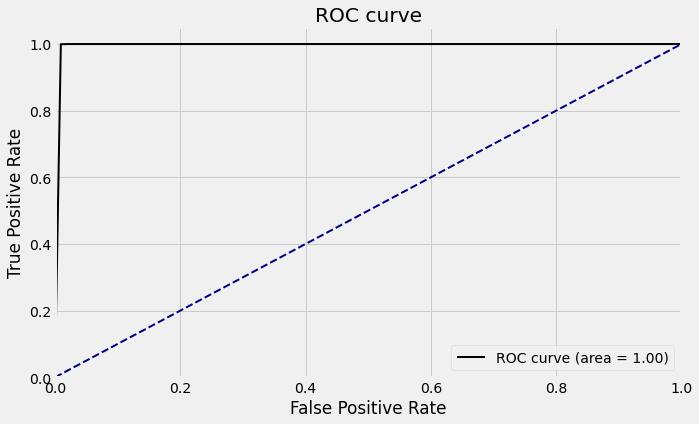

In [26]:
#ROC curve and Area under the curve plotting
predicting_probabilites =knn_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Final Training Accuracy: 100.0
Validation Accuracy 98.70987098709871

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1700
           1       0.97      1.00      0.99      1633

    accuracy                           0.99      3333
   macro avg       0.99      0.99      0.99      3333
weighted avg       0.99      0.99      0.99      3333



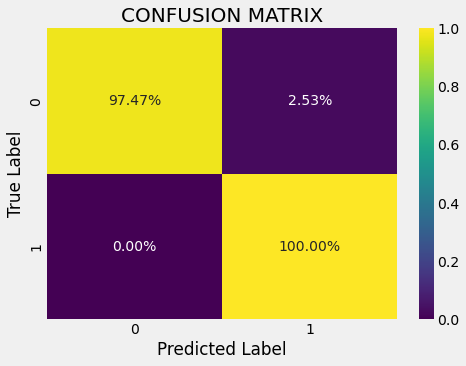

In [26]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 500)
mlp.fit(x_train,y_train)
mlp_pred=mlp.predict(x_test)

print(f'Final Training Accuracy: {mlp.score(x_train,y_train)*100}')
mlp_acc = accuracy_score(y_test,mlp_pred)*100
print('Validation Accuracy',mlp_acc)
print ("\nClassification report :\n",(classification_report(y_test,mlp_pred)))
#Confusion matrix
def plot_confusion_matrix(y_test, mlp_pred, title='', cmap='viridis'):
    cm = confusion_matrix(y_test, mlp_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_percent, annot=True, cmap=cmap, fmt='.2%', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title, fontsize=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
plot_confusion_matrix(y_test, mlp_pred, title='CONFUSION MATRIX')

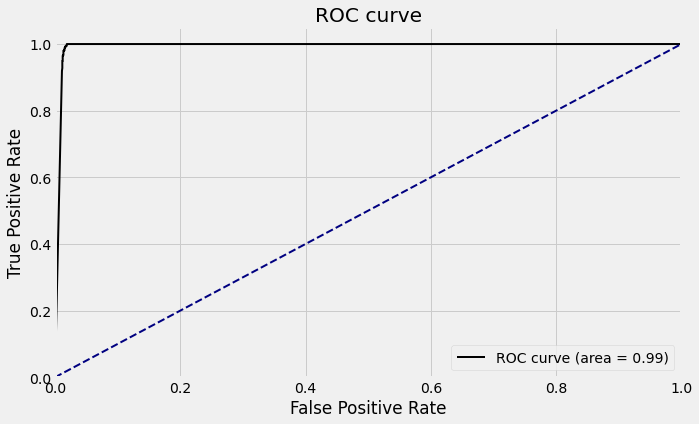

In [29]:
#ROC curve and Area under the curve plotting
predicting_probabilites =mlp.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

99.96999699969997


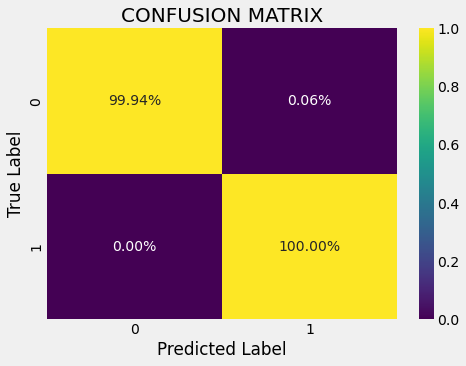

In [27]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('rf', RandomForestClassifier()))
estimator.append(('SVC',SVC(kernel='linear',probability=True)))
estimator.append(('mlp', MLPClassifier()))
estimator.append(('knn_model', KNeighborsClassifier()))
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
hard_voting_score = accuracy_score(y_test, y_pred)*100
print( hard_voting_score)

#Confusion matrix
def plot_confusion_matrix(y_test, y_pred, title='', cmap='viridis'):
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_percent, annot=True, cmap=cmap, fmt='.2%', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title, fontsize=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
plot_confusion_matrix(y_test, y_pred, title='CONFUSION MATRIX')

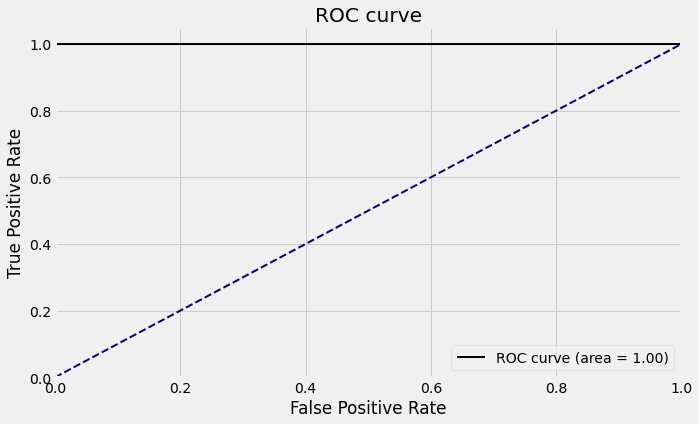

In [33]:
#ROC curve and Area under the curve plotting
from sklearn.metrics import roc_curve, auc

# x_test: test data, y_test: true labels, vot_hard: majority voting classifier
y_pred = vot_hard.predict(x_test) # predicted labels by majority voting
predicting_probabilites = (y_pred == 1).astype(int) # convert labels to binary values
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


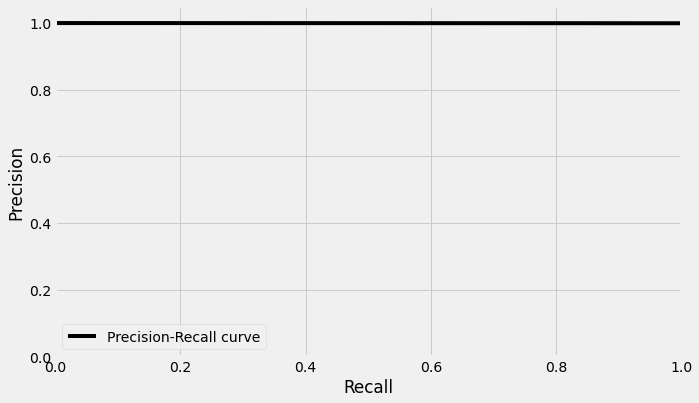

In [30]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision, recall and threshold values
precision, recall, thresholds = precision_recall_curve(y_test, predicting_probabilites)

# Plot the precision-recall curve
plt.plot(recall, precision, color='black', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()

In [23]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [42]:
ds_acc=round(accuracy_score(y_test,ds_pred),4)
mlp_acc = round(accuracy_score(y_test,mlp_pred),4)
knn_acc = round(accuracy_score(y_test,knn_pred),4)
svc_acc =round( accuracy_score(y_test,svc_pred),4)
rf_acc=round(accuracy_score(y_test,rf_pred),4)
hard_voting_score = round(accuracy_score(y_test, y_pred),4)

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
#calculating f1 scores
svc_f1 = round(f1_score(y_test, svc_pred, average='weighted'),4)
ds_f1 = round(f1_score(y_test, ds_pred, average='weighted'),4)
rf_f1 = round(f1_score(y_test, rf_pred, average='weighted'),4)
knn_f1 = round(f1_score(y_test, knn_pred, average='weighted'),4)
mlp_f1 = round(f1_score(y_test, mlp_pred, average='weighted'),4)
MajorityVoting_f1=round(f1_score(y_test, y_pred, average='weighted'),4)

In [44]:
rf_precision = round(precision_score(y_test, rf_pred, average='weighted'),4)
knn_precision = round(precision_score(y_test, knn_pred, average='weighted'),4)
ds_precision = round(precision_score(y_test, ds_pred, average='weighted'),4)
svc_precision = round(precision_score(y_test, svc_pred, average='weighted'),4)
mlp_precision = round(precision_score(y_test, mlp_pred, average='weighted'),4)
MajorityVoting_precision=round(precision_score(y_test, y_pred, average='weighted'),4)


In [45]:
svc_recall = round(recall_score(y_test, svc_pred, average='weighted'),4)
ds_recall = round(recall_score(y_test, ds_pred, average='weighted'),4)
rf_recall = round(recall_score(y_test, rf_pred, average='weighted'),4)
knn_recall = round(recall_score(y_test, knn_pred, average='weighted'),4)
mlp_recall = round(recall_score(y_test, mlp_pred, average='weighted'),4)
MajorityVoting_recall=round(recall_score(y_test, y_pred, average='weighted'),4)

In [46]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Classifier", "Accuracy", "F1 Score", "Precision","recall"]

table.add_row(["Random Forest ", rf_acc , rf_f1, rf_precision,rf_recall])
table.add_row(["KNN", knn_acc, knn_f1, knn_precision,knn_recall])
table.add_row(["Decision Tree", ds_acc, ds_f1, ds_precision,ds_recall])
table.add_row(["SVC", svc_acc,svc_f1, svc_precision,svc_recall])
table.add_row(["MLP", mlp_acc, mlp_f1, mlp_precision,mlp_recall])
table.add_row(["Majority Voting",hard_voting_score,MajorityVoting_f1,MajorityVoting_precision,MajorityVoting_recall])
print(table)

+-----------------+----------+----------+-----------+--------+
|    Classifier   | Accuracy | F1 Score | Precision | recall |
+-----------------+----------+----------+-----------+--------+
|  Random Forest  |  0.9988  |  0.9988  |   0.9988  | 0.9988 |
|       KNN       |  0.9847  |  0.9847  |   0.9852  | 0.9847 |
|  Decision Tree  |  0.934   |  0.9339  |   0.9394  | 0.934  |
|       SVC       |  0.9781  |  0.9781  |   0.979   | 0.9781 |
|       MLP       |  0.9865  |  0.9865  |   0.9869  | 0.9865 |
| Majority Voting |  0.9997  |  0.9997  |   0.9997  | 0.9997 |
+-----------------+----------+----------+-----------+--------+


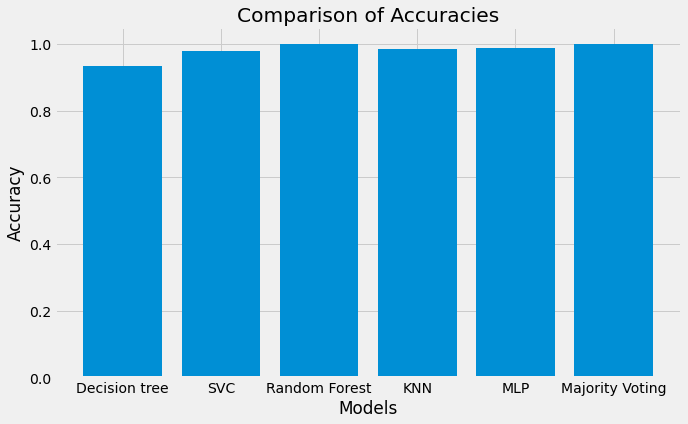

In [38]:
accuracies = [ds_acc,svc_acc, rf_acc, knn_acc,mlp_acc,hard_voting_score]

# Plot the accuracies in a bar chart
plt.bar(['Decision tree','SVC', 'Random Forest', 'KNN','MLP','Majority Voting'], accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.show()